In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [3]:
b = 1
c = (10,1)
splits = [1,2,3,4,5]

#path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]
w_L1 = [0.0, 0.1]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
csc = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40]
#channels = [57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83]
#units = [96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(csc)
n_splits = len(splits)
n_units = len(units)

In [36]:
trials = []
for a in alphas: 
    csc = "5-40"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    csc = "57-80"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    
    L1_trial_df = pd.DataFrame({
        "costs" : np.mean([L1_trial_df1.costs, L1_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L1_trial_df1.theta.values.tolist()), 
             np.array(L1_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L1_trial_df1.losses.values.tolist()), 
             np.array(L1_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L1_trial_df1.preds.values.tolist()), 
             np.array(L1_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L2_trial_df = pd.DataFrame({
        "costs" : np.mean([L2_trial_df1.costs, L2_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L2_trial_df1.theta.values.tolist()), 
             np.array(L2_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L2_trial_df1.losses.values.tolist()), 
             np.array(L2_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L2_trial_df1.preds.values.tolist()), 
             np.array(L2_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L1_trial_exp_df = pd.DataFrame({
        "mean validation\ncosts [NLL]" : np.array([L1_trial_df["costs"][0]]), 
        "alpha" : np.log10(a) if a > 0 else -4.5, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "mean validation\ncosts [NLL]" : np.array([L2_trial_df["costs"][0]]), 
        "alpha" : np.log10(a) if a > 0 else -4.5, 
        "regularization" : "L2"
    })
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,mean validation\ncosts [NLL],alpha,regularization
0,1.072214e+10,-4.50000,L1
1,1.985795e+08,-4.50000,L2
2,2.974868e-01,-4.00000,L1
3,7.469172e+00,-4.00000,L2
4,8.803641e-03,-3.69897,L1


In [ ]:
print(alphas)
print([np.log(a) if a > 0 else -10 for a in alphas])

[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]
[-10, -9.210340371976182, -8.517193191416238, -8.111728083308073, -7.824046010856292, -7.600902459542082, -7.418580902748128, -7.264430222920869, -7.1308988302963465, -7.013115794639964, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0]


In [ ]:
np.exp(-8)

0.00033546262790251185

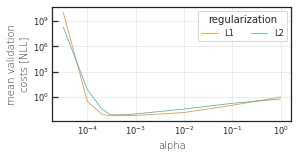

In [37]:
fig3, ax = pltr.plot_cv_costs(exp_df)

#print(ax.get_xticklabels())
xticks = ax.get_xticks()
xticklabels = [f'$10^{{{int(i)}}}$' if i!=-4.5 else '0.0' for i in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)


plt.semilogy()
#plt.semilogx()

plt.subplots_adjust(
    left=0.16, bottom=0.2, right=0.99, top=0.99
)
fig3.savefig('plots/plot4.png')
fig3.savefig('plots/plot4.pdf')

In [ ]:
trials = []
for a in alphas: 
    trial_df = pd.read_pickle(path+f"CV_a{a}.csv")
    trial_df["alpha"] = a
    trial_df["split"] = np.arange(0,len(trial_df), 1)
    trials.append(trial_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_57-80_SUA_c(10, 1)_b1/final_runs/CV_a0.0.csv'

In [ ]:
exp_df["losses"] = exp_df["losses"].apply(lambda x : np.array(x))
exp_df["final loss"] = exp_df["losses"].apply(lambda x : x[-1])
exp_df["theta"] = exp_df["theta"].apply(lambda x : np.array(x))
exp_df["preds"] = exp_df["preds"].apply(lambda x : np.array(x))
exp_df.head()

In [ ]:
exp_df["theta"][0]

In [ ]:
sns.lineplot(x="alpha", y="final loss", data=exp_df, hue="unit")